In [2]:
import requests 
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
import numpy as np
import wordcloud
from PIL import Image

### Lyric cleanup

In [3]:
gaga=pd.read_csv('gagaLyrics.csv')
sinatra=pd.read_csv('sinatraLyrics.csv')

In [4]:
model= spacy.load('en_core_web_md')

In [5]:
gagaNLP=pd.read_csv('gagaLyrics.csv')
listFilter=[line!='no lyrics' for line in gagaNLP['songs']]
gagaNLP=gagaNLP[listFilter]['songs']
gagaString=[]
for i in range(len(gagaNLP)):
    gagaString.append(gagaNLP.iloc[i])
gagaString=' '.join(gagaString) 
gagaString=gagaString.lower()
tokenGaga=model(gagaString)

In [6]:
token=[]; alpha=[]; stop=[]; punct=[]; digit=[]; lemma=[]; pos=[]; sentiment=[]
for word in tokenGaga:
    token.append(word)
    alpha.append(word.is_alpha)
    stop.append(word.is_stop)
    punct.append(word.is_punct)
    digit.append(word.is_digit)
    lemma.append(word.lemma_)
    pos.append(word.pos_)
    sentiment.append(word.sentiment)
tokenTgaga=pd.DataFrame({'Token':token,'Alpha':alpha,'Stop':stop,'Punct':punct,'Digit':digit,'Lemma':lemma,
                         'Pos':pos,'Sentiment':sentiment})    

In [7]:
tokenTgaga.head()

,Token,Alpha,Stop,Punct,Digit,Lemma,Pos,Sentiment
0,sou,True,False,False,False,sou,ADJ,0.0
1,-,False,False,True,False,-,PUNCT,0.0
2,sour,True,False,False,False,sour,ADJ,0.0
3,candy,True,False,False,False,candy,NOUN,0.0
4,,False,False,False,False,,SPACE,0.0


In [8]:
tokenTgaga.shape

(39688, 8)

In [9]:
filterPunct=[i==False for i in tokenTgaga['Punct']]
tokenTgaga=tokenTgaga[filterPunct]
filterDigit=[i==False for i in tokenTgaga['Digit']]
tokenTgaga=tokenTgaga[filterDigit]

In [10]:
tokenTgaga.shape

(34538, 8)

In [11]:
sinatraNLP=pd.read_csv('sinatraLyrics.csv')
listFilter=[line!='no lyrics' for line in sinatraNLP['songs']]
sinatraNLP=sinatraNLP[listFilter]['songs']
sinatraString=[]
for i in range(len(sinatraNLP)):
    sinatraString.append(sinatraNLP.iloc[i])
sinatraString=' '.join(sinatraString) 
sinatraString=sinatraString.lower()
tokenSinatra=model(sinatraString)

In [12]:
token=[]; alpha=[]; stop=[]; punct=[]; digit=[]; lemma=[]; pos=[]; sentiment=[]
for word in tokenSinatra:
    token.append(word)
    alpha.append(word.is_alpha)
    stop.append(word.is_stop)
    punct.append(word.is_punct)
    digit.append(word.is_digit)
    lemma.append(word.lemma_)
    pos.append(word.pos_)
    sentiment.append(word.sentiment)
tokenTsinatra=pd.DataFrame({'Token':token,'Alpha':alpha,'Stop':stop,'Punct':punct,'Digit':digit,'Lemma':lemma,
                         'Pos':pos,'Sentiment':sentiment})

In [13]:
tokenTsinatra.head()

,Token,Alpha,Stop,Punct,Digit,Lemma,Pos,Sentiment
0,laura,True,False,False,False,laura,PROPN,0.0
1,is,True,True,False,False,be,AUX,0.0
2,the,True,True,False,False,the,DET,0.0
3,face,True,False,False,False,face,NOUN,0.0
4,in,True,True,False,False,in,ADP,0.0


In [14]:
tokenTsinatra.shape

(13124, 8)

In [15]:
filterPunct=[i==False for i in tokenTsinatra['Punct']]
tokenTsinatra=tokenTsinatra[filterPunct]
filterDigit=[i==False for i in tokenTsinatra['Digit']]
tokenTsinatra=tokenTsinatra[filterDigit]

In [16]:
tokenTsinatra.shape

(12171, 8)

In [17]:
print('Lady Gaga\'s total stop word count: ', tokenTgaga['Stop'].sum()) 
print('Frank Sinatra\'s total stop word count: ', tokenTsinatra['Stop'].sum())
print('Lady Gaga\'s percent of stop words: ', tokenTgaga['Stop'].sum()/len(tokenTgaga))
print('Frank Sinatra\'s percent of stop words: ', tokenTsinatra['Stop'].sum()/len(tokenTsinatra))

Lady Gaga's total stop word count:  15978
Frank Sinatra's total stop word count:  6734
Lady Gaga's percent of stop words:  0.4626208813480804
Frank Sinatra's percent of stop words:  0.5532823925725084


In [18]:
tokenTgaga.shape

(34538, 8)

In [19]:
tokenTsinatra.shape

(12171, 8)

In [20]:
filterStop=[i==True for i in tokenTgaga['Stop']]
tokenTgaga=tokenTgaga[filterStop]

In [21]:
filterStop=[i==True for i in tokenTsinatra['Stop']]
tokenTsinatra=tokenTsinatra[filterStop]

In [22]:
tokenTgaga.shape

(15978, 8)

In [23]:
tokenTsinatra.shape

(6734, 8)

### Lyric EDA

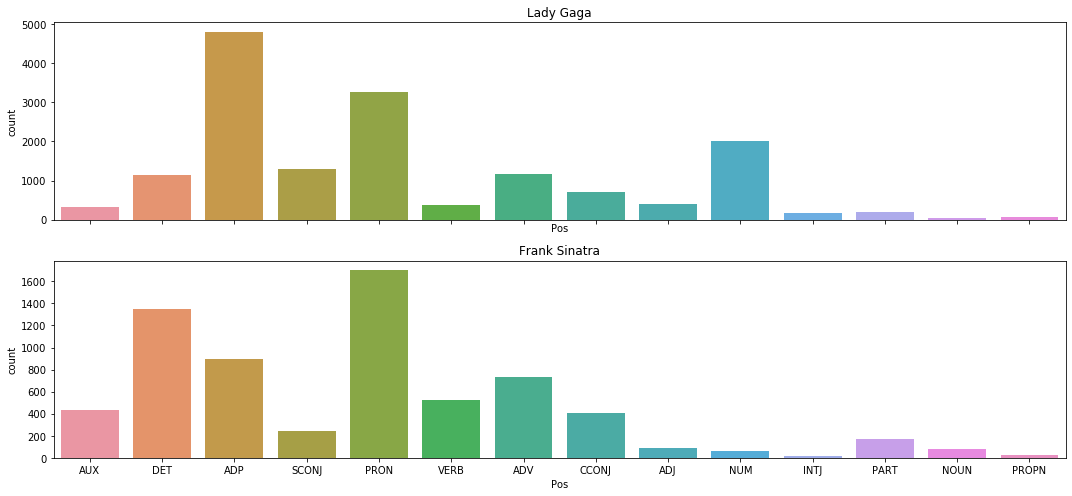

In [24]:
fig, g=plt.subplots(2,1, figsize=(15,7), sharex=True)
sns.countplot(tokenTgaga['Pos'], ax=g[0]).set_title('Lady Gaga')
sns.countplot(tokenTsinatra['Pos'], ax=g[1]).set_title('Frank Sinatra')
plt.tight_layout()

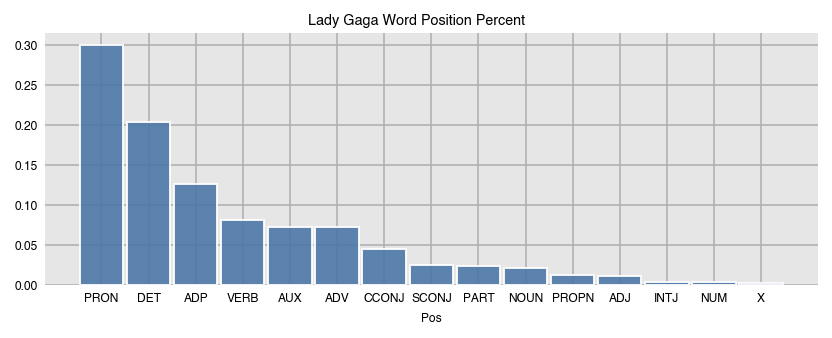

In [25]:
dxp.count('Pos', data=tokenTgaga, normalize=True, title='Lady Gaga Word Position Percent')

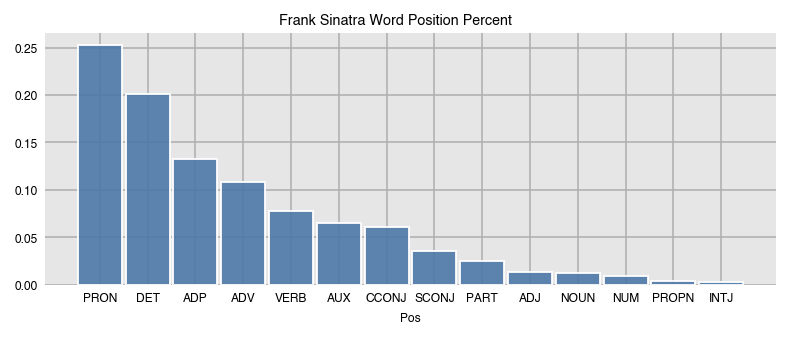

In [26]:
dxp.count('Pos', data=tokenTsinatra, normalize=True, title='Frank Sinatra Word Position Percent')

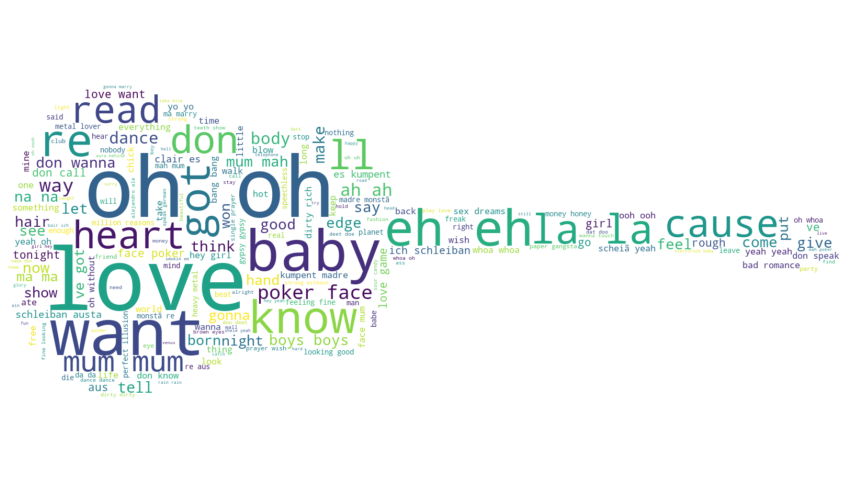

In [27]:
mask1=np.array(Image.open('guitar.png'))
cloud1=wordcloud.WordCloud(background_color="white", mask=mask1).generate(gagaString)
plt.figure(figsize=(15,15))
plt.imshow(cloud1, interpolation='bilinear')
plt.axis("off")
plt.savefig('gaga_cloud.png')
plt.show()

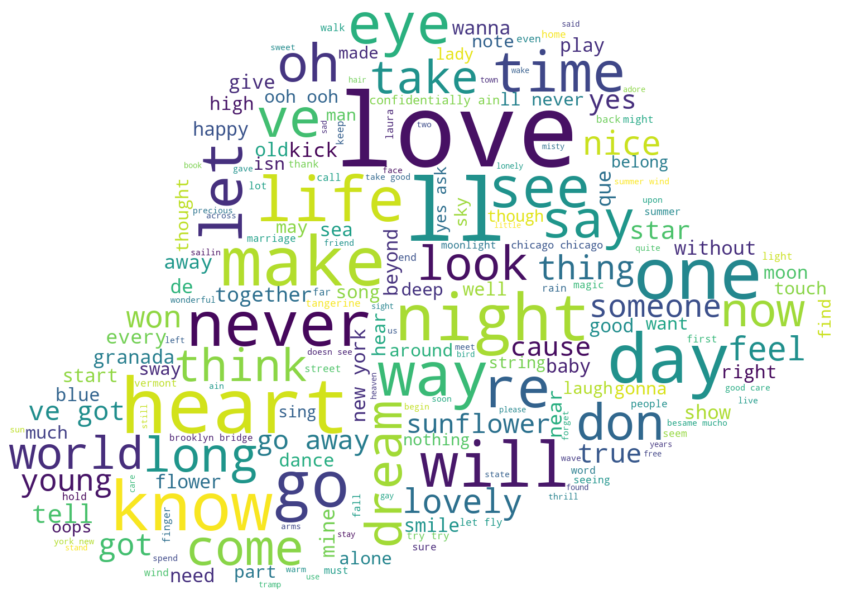

In [28]:
mask2=np.array(Image.open('sinatra.jpg'))
cloud2=wordcloud.WordCloud(background_color="white", mask=mask2).generate(sinatraString)
plt.figure(figsize=(15,15))
plt.imshow(cloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('sinatra_cloud.png')
plt.show()